# 1. Cargar Librerias 

In [41]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import io
import geopandas as gpd
import pandas as pd
import numpy as np
import pandas 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import rasterio
from rasterio.plot import reshape_as_image, reshape_as_raster
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
import ipywidgets as widgets
from IPython.display import display
from sklearn.linear_model import Lasso, Ridge
import plotly.io as pio
pio.renderers.default = "notebook"

# 2. Cargar Shapefile para entrenar el modelo de regresión

In [42]:
shapefile_path = r"C:\Users\neotr\OneDrive\Escritorio\ENTREGABLES_UNAL_HUMEDALES\Entregables_Humedal_Cordoba\SHP\Puntos_Muestreo_Reflectancia_Indices_Excel_2.shp"
gdf = gpd.read_file(shapefile_path)
gdf

,Name,Blue,Green,Pan,Red,RedEdge,NIR,NDVI,NDWI,EVI,...,DQO,pH,Fosfatos,CE,Turbidez,Nitratos,Sulfatos,ficocianin,Chl,geometry
0,P1,331.578512,715.958678,593.429752,294.842975,1077.388430,1499.157025,0.671318,29.240503,3.977107,...,94.0,7.90,0.7763,186.6,86.0,NaN,4.675,0.001,1.488,POINT Z (4881842.574 2077977.983 0)
1,P10,384.785124,657.983471,514.256198,322.669421,826.066116,736.652893,0.390807,46.951288,-1.893458,...,94.0,8.74,0.7087,184.0,93.0,0.230,5.122,0.000,2.123,POINT Z (4881798.676 2077838.481 0)
2,P11,429.991736,738.586777,566.785124,362.702479,892.727273,726.082645,0.333632,14.221407,-2.232676,...,113.0,8.56,0.8343,183.3,90.0,0.222,5.188,0.004,2.648,POINT Z (4881809.311 2077858.112 0)
3,P12,395.925620,686.636364,537.239669,344.537190,848.512397,769.198347,0.380933,43.820481,-25.859135,...,94.0,8.52,0.6513,182.0,81.0,NaN,4.964,0.002,0.745,POINT Z (4881827.542 2077861.592 0)
4,P13,405.710744,696.760331,551.000000,339.396694,857.181818,869.000000,0.438305,41.763944,26.728346,...,94.0,8.47,0.7546,184.8,103.0,0.207,5.510,0.004,1.737,POINT Z (4881773.544 2077891.436 0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,P78,380.214876,656.404959,503.619835,316.809917,764.925620,683.181818,0.366323,40.725208,-3.800445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.839,POINT Z (4881791.668 2077889.676 0)
74,P79,384.661157,739.884298,582.719008,328.661157,978.537190,1324.148760,0.602342,31.479235,7.082722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005,1.790,POINT Z (4881844.325 2077953.395 0)
75,P8,352.545455,628.206612,476.388430,297.636364,743.917355,683.471074,0.393168,49.082624,-4.004148,...,101.0,7.73,1.1198,191.0,93.0,NaN,5.160,0.006,0.519,POINT Z (4881824.99 2077897.666 0)
76,P80,348.297521,616.438017,485.008264,285.074380,785.355372,799.727273,0.474269,46.168200,2.771053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003,1.070,POINT Z (4881832.476 2077908.921 0)


#### Normalización de valores con el ln

In [43]:
import numpy as np
import pandas as pd
import geopandas as gpd


# ============================================================
# === LIMITAR EL GEODATAFRAME A LOS PRIMEROS 65 REGISTROS ===
# ============================================================
gdf = gdf.iloc[:65].copy()  # Mantiene solo los primeros 65 registros

# ============================================================
# === LISTA DE PARÁMETROS DE CALIDAD DE AGUA ================
# ============================================================
param_cols = [
    "DQO",
    "Fosfatos",
    "Turbidez",
    "Nitratos",
    "Sulfatos",
    "ficocianin",
    "Chl",
    "CE"
]

# ============================================================
# === TRANSFORMACIÓN LOGARÍTMICA NATURAL ====================
# ============================================================
for col in param_cols:
    if col in gdf.columns:
        new_col = f"ln_{col}"
        gdf[new_col] = gdf[col].apply(
            lambda x: np.log(x) if pd.notnull(x) and x > 0 else 0.3
        )

# ============================================================
# === RESULTADOS =============================================
# ============================================================
print(" Transformación logarítmica aplicada correctamente.")
print(f" Registros retenidos: {len(gdf)}")
print(" Nuevas columnas creadas:")
print([f"ln_{c}" for c in param_cols])




 Transformación logarítmica aplicada correctamente.
 Registros retenidos: 65
 Nuevas columnas creadas:
['ln_DQO', 'ln_Fosfatos', 'ln_Turbidez', 'ln_Nitratos', 'ln_Sulfatos', 'ln_ficocianin', 'ln_Chl', 'ln_CE']


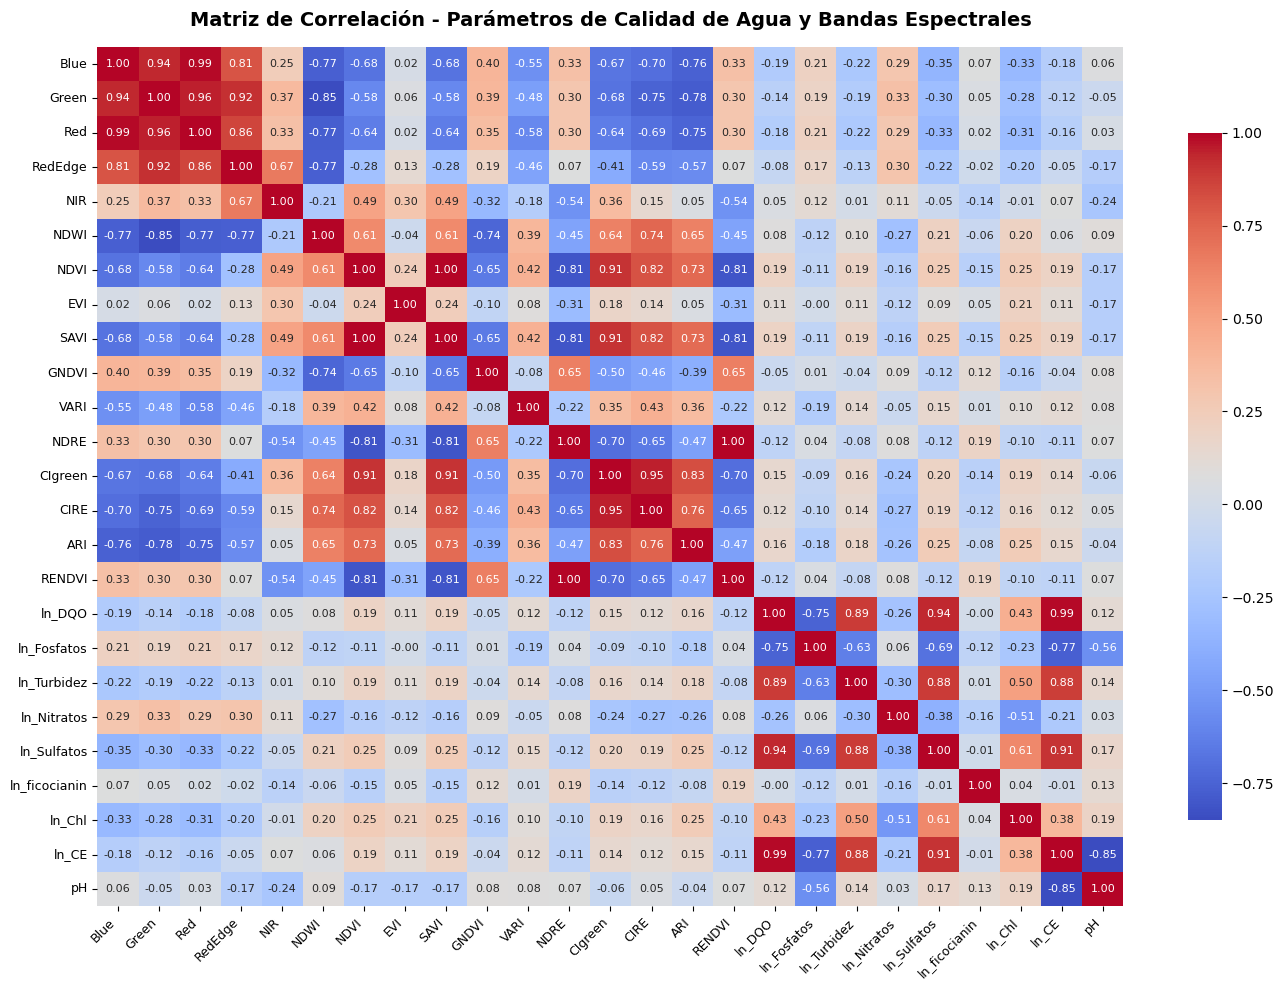

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# === MATRIZ DE CORRELACIÓN ===
plt.figure(figsize=(14, 10))  

sns.heatmap(
    gdf[
        [
            "Blue","Green","Red","RedEdge","NIR",
            "NDWI","NDVI","EVI","SAVI","GNDVI","VARI",
            "NDRE","CIgreen","CIRE","ARI","RENDVI",
            "ln_DQO","ln_Fosfatos","ln_Turbidez","ln_Nitratos",
            "ln_Sulfatos","ln_ficocianin","ln_Chl","ln_CE","pH"
        ]
    ].corr(),
    annot=True,          # Muestra los valores numéricos
    cmap='coolwarm',     # Paleta más contrastante
    fmt='.2f',           # Dos decimales
    annot_kws={'size': 8},  # Tamaño de número más pequeño
    cbar_kws={'shrink': 0.8}  # Barra lateral más compacta
)

plt.title("Matriz de Correlación - Parámetros de Calidad de Agua y Bandas Espectrales", fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


## 2.1 Selección del parametro a analizar

### Ordenamiento del Dataset

In [52]:
# Define a variable to store the selected value
selected_value = None  

# Function to update the variable
def on_value_change(change):
    global selected_value
    selected_value = change['new']
    print(f"Selected Water Quality Parameter: {selected_value}")

# Create ToggleButtons widget
toggle_buttons = widgets.ToggleButtons(
    options=["Selecciona...", "ln_DQO","ln_Fosfatos","ln_Turbidez","ln_Nitratos",
            "ln_Sulfatos","ln_ficocianin","ln_Chl","ln_CE","pH"],
    description='Parámetro de Calidad de Agua:',
    disabled=False
)

# Attach event listener
toggle_buttons.observe(on_value_change, names='value')

# Display widget
display(toggle_buttons)


ToggleButtons(description='Parámetro de Calidad de Agua:', options=('Selecciona...', 'ln_DQO', 'ln_Fosfatos', …

# 3. Extraer Variables predictoras y variables respuesta para el modelo SVM 

In [53]:
X= gdf.drop(columns = ["Name","ID_Muestra","ln_DQO","ln_Fosfatos","ln_Turbidez","ln_Nitratos",
            "ln_Sulfatos","ln_ficocianin","ln_Chl","ln_CE","pH","DQO","Fosfatos","Turbidez","Nitratos",
            "Sulfatos","ficocianin","Chl","CE","Pan","geometry"])
y = gdf[selected_value]
X




,Blue,Green,Red,RedEdge,NIR,NDVI,NDWI,EVI,SAVI,GNDVI,VARI,NDRE,CIgreen,CIRE,ARI,RENDVI
0,331.578512,715.958678,294.842975,1077.388430,1499.157025,0.671318,29.240503,3.977107,1.006696,0.353480,0.620842,0.163805,1.094836,0.393322,0.000468,0.163805
1,384.785124,657.983471,322.669421,826.066116,736.652893,0.390807,46.951288,-1.893458,0.585934,0.056296,0.563630,41.536912,0.119913,-0.106933,0.000308,41.536912
2,429.991736,738.586777,362.702479,892.727273,726.082645,0.333632,14.221407,-2.232676,0.500218,30.543692,0.561063,40.411436,-0.016434,-0.185348,0.000233,40.411436
3,395.925620,686.636364,344.537190,848.512397,769.198347,0.380933,43.820481,-25.859135,0.571144,1.232330,0.539585,39.859483,0.120916,-0.092422,0.000277,39.859483
4,405.710744,696.760331,339.396694,857.181818,869.000000,0.438305,41.763944,26.728346,0.657186,0.109850,0.568049,14.358109,0.247779,0.015354,0.000268,14.358109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,475.652893,765.429752,402.793388,888.859504,915.619835,0.388848,38.916290,-13.393249,0.583050,0.089108,0.524475,9.704247,0.196628,0.031230,0.000181,9.704247
61,525.305785,823.636364,445.504132,971.355372,942.776860,0.358106,37.057542,-5.225563,0.536965,0.067183,0.509402,24.031107,0.145115,-0.028037,0.000184,24.031107
62,566.214876,989.991736,509.628099,1102.570248,872.462810,0.262410,0.063339,-3.819904,0.393472,35.138072,0.515185,33.081715,-0.118479,-0.207874,0.000103,33.081715
63,476.611570,834.404959,410.421488,941.801653,885.289256,0.366446,35.230348,-3.049757,0.549457,2.893053,0.552679,31.941378,0.061582,-0.058774,0.000136,31.941378


## 3.1 Separar variables de entrenamiento y de validación del modelo

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train

,Blue,Green,Red,RedEdge,NIR,NDVI,NDWI,EVI,SAVI,GNDVI,VARI,NDRE,CIgreen,CIRE,ARI,RENDVI
36,497.289256,878.388430,454.743802,1167.181818,1401.694215,0.509904,28.524325,4.716618,0.764651,0.229296,0.507469,0.091255,0.596454,0.202044,0.000281,0.091255
39,488.157025,862.115702,450.719008,998.157025,1048.355372,0.398641,34.215071,-2.975567,0.597762,0.097317,0.499567,2.919475,0.216596,0.051425,0.000157,2.919475
63,476.611570,834.404959,410.421488,941.801653,885.289256,0.366446,35.230348,-3.049757,0.549457,2.893053,0.552679,31.941378,0.061582,-0.058774,0.000136,31.941378
35,490.157025,876.157025,443.661157,1074.206612,1147.636364,0.442274,32.284453,1.229037,0.663201,0.133489,0.522702,4.206506,0.310443,0.070119,0.000209,4.206506
27,491.223140,803.710744,437.966942,922.008264,972.619835,0.376640,36.254496,4.557285,0.564760,0.773653,0.489380,12.181709,0.210047,0.054592,0.000156,12.181709
58,525.851240,816.603306,460.132231,985.752066,1029.512397,0.382156,35.398317,-4.615587,0.573042,0.115116,0.475751,5.630346,0.261120,0.045778,0.000209,5.630346
50,460.958678,782.041322,377.619835,887.115702,838.454545,0.379045,37.365173,0.543530,0.568333,2.767246,0.580145,34.212396,0.073056,-0.053553,0.000151,34.212396
3,395.925620,686.636364,344.537190,848.512397,769.198347,0.380933,43.820481,-25.859135,0.571144,1.232330,0.539585,39.859483,0.120916,-0.092422,0.000277,39.859483
31,509.057851,891.884298,463.396694,1300.429752,1825.429752,0.595101,23.783505,4.478911,0.892457,0.343596,0.506779,0.168023,1.048778,0.404947,0.000353,0.168023
24,413.347107,733.446281,363.504132,906.190083,973.685950,0.456245,38.269681,-10.448202,0.684112,0.140472,0.542349,4.374325,0.328636,0.076383,0.000259,4.374325


# 4. Entrenar el modelos de aprendizaje computacional

### 4.1 SVR

In [55]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}
# Train SVR with GridSearchCV
svr = SVR()
svr_cv = GridSearchCV(svr, param_grid_svr, cv=5, n_jobs=-1)
svr_cv.fit(X_train, y_train)
# Extract best parameters
best_params_svr = svr_cv.best_params_
print("Best SVR Parameters:", best_params_svr)
# Define new optimized models with best parameters
optimized_svr = SVR(**best_params_svr)

# Train the optimized models
optimized_svr.fit(X_train, y_train)
optimized_svr


Best SVR Parameters: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,0.1
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### 4.2 XG Boost

In [56]:
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

gbr = GradientBoostingRegressor(random_state=13)
gbr_cv = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=3, scoring='neg_mean_squared_error',n_jobs=-1)
gbr_cv.fit(X_train, y_train)
best_params_gbr = gbr_cv.best_params_
print("Best GBR Parameters:", best_params_gbr)
optimized_gbr = GradientBoostingRegressor(random_state=13, **best_params_gbr)
optimized_gbr.fit(X_train, y_train)
optimized_gbr

Best GBR Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


,loss,'squared_error'
,learning_rate,0.01
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


### 4.3 Random Forest Regressor

In [57]:
# Define parameter grids
param_grid_rfr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}
# Train Random Forest Regressor with GridSearchCV
rfr = RandomForestRegressor(random_state=13)
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid_rfr, cv=3, scoring='neg_mean_squared_error',n_jobs=-1)
rfr_cv.fit(X_train, y_train)
best_params_rfr = rfr_cv.best_params_
print("Best RFR Parameters:", best_params_rfr)
optimized_rfr = RandomForestRegressor(random_state=13, **best_params_rfr,n_jobs=-1)
optimized_rfr.fit(X_train, y_train)
optimized_rfr

Best RFR Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 5 Validación de los modelos

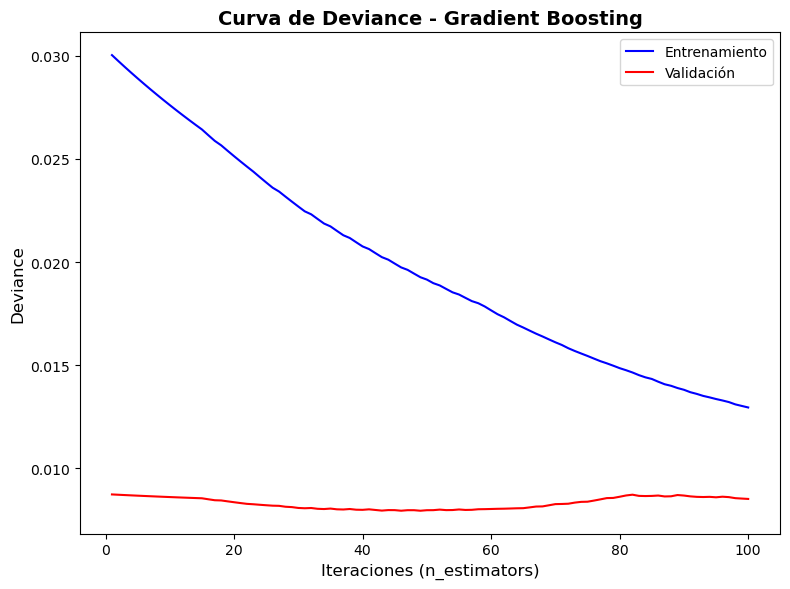

Gradient Boosting:
MAE  = 0.0873
RMSE = 0.0923
R²   = -0.2001



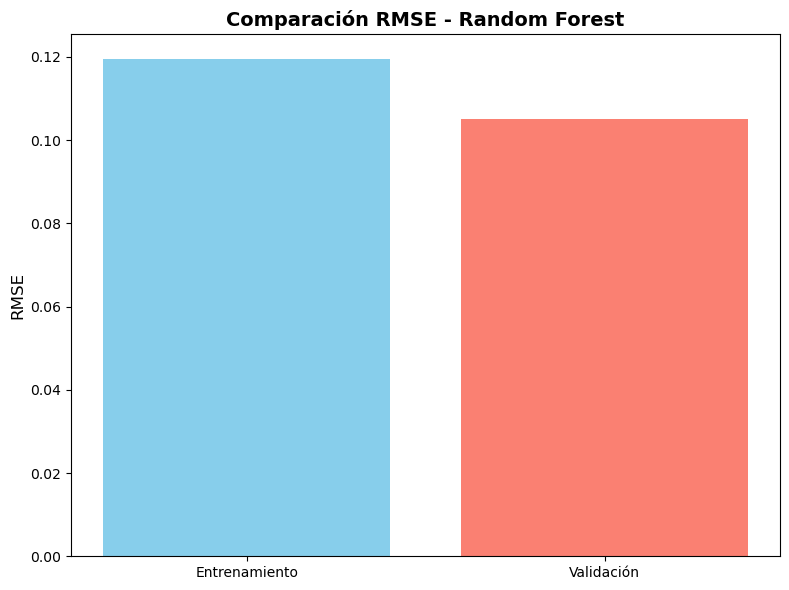

 Random Forest:
MAE  = 0.0932
RMSE = 0.1050
R²   = -0.5532



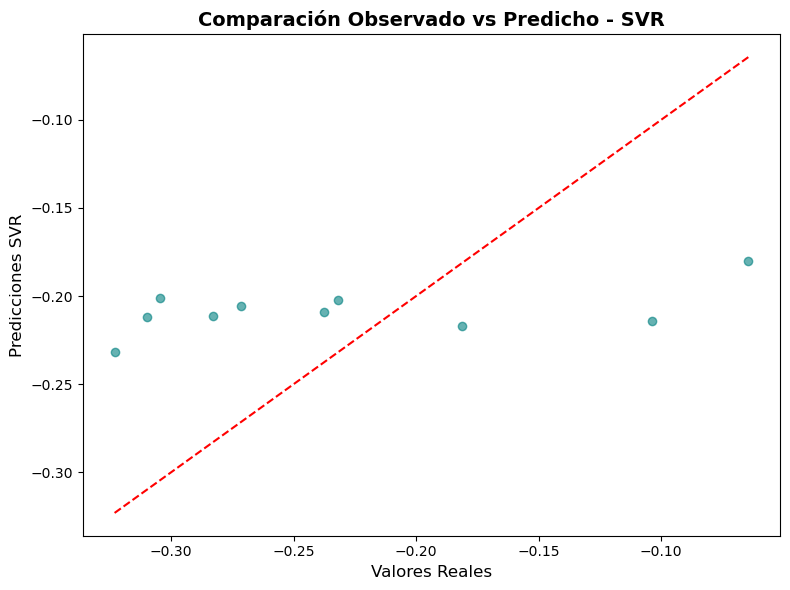

 Support Vector Regressor:
MAE  = 0.0751
RMSE = 0.0817
R²   = 0.0585



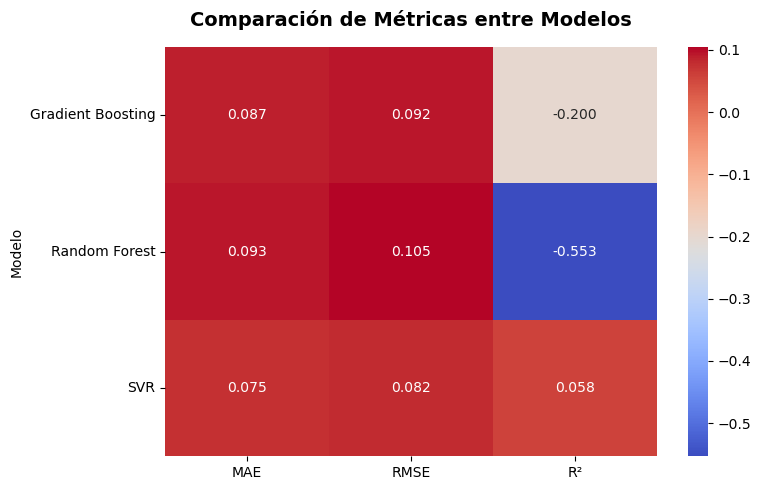

C:\Users\neotr\AppData\Local\Temp\ipykernel_30848\1576571591.py:121: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\neotr\AppData\Local\Temp\ipykernel_30848\1576571591.py:127: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




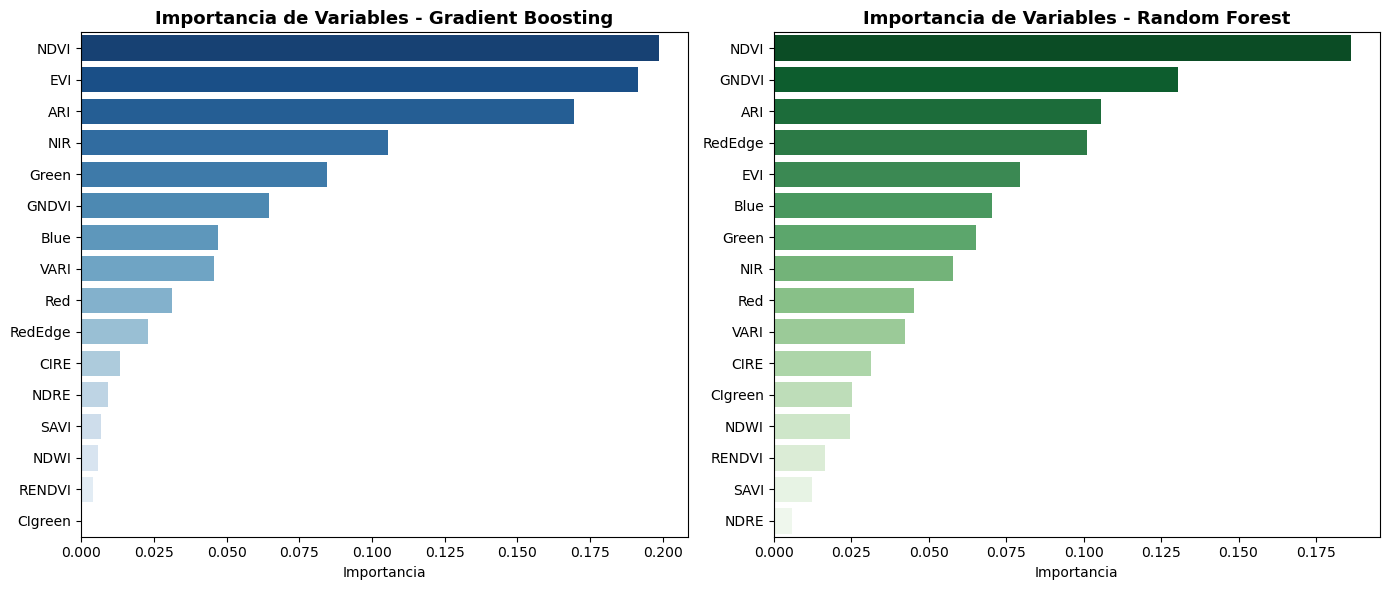

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==========================================================
# === MODELO: GRADIENT BOOSTING REGRESSOR ==================
# ==========================================================
n_estimators = best_params_gbr['n_estimators']
test_score = np.zeros((n_estimators,), dtype=np.float64)

for i, y_pred in enumerate(optimized_gbr.staged_predict(X_test)):
    if i < n_estimators:
        test_score[i] = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.title("Curva de Deviance - Gradient Boosting", fontsize=14, fontweight="bold")
plt.plot(np.arange(n_estimators) + 1, optimized_gbr.train_score_, "b-", label="Entrenamiento")
plt.plot(np.arange(n_estimators) + 1, test_score, "r-", label="Validación")
plt.legend()
plt.xlabel("Iteraciones (n_estimators)", fontsize=12)
plt.ylabel("Deviance", fontsize=12)
plt.tight_layout()
plt.show()

y_pred_gbr = optimized_gbr.predict(X_test)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting:")
print(f"MAE  = {mae_gbr:.4f}")
print(f"RMSE = {rmse_gbr:.4f}")
print(f"R²   = {r2_gbr:.4f}\n")

# === Importancia de variables ===
feature_names = ["Blue","Green","Red","RedEdge","NIR","NDWI","NDVI","EVI",
                 "SAVI","GNDVI","VARI","NDRE","CIgreen","CIRE","ARI","RENDVI"]

importance_gbr = optimized_gbr.feature_importances_
feature_importance_gbr = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importance_gbr
}).sort_values(by='Importancia', ascending=False)

# ==========================================================
# === MODELO: RANDOM FOREST REGRESSOR ======================
# ==========================================================
y_pred_rf = optimized_rfr.predict(X_test)
y_train_rf = optimized_rfr.predict(X_train)

rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_train_rf))

plt.figure(figsize=(8, 6))
plt.title("Comparación RMSE - Random Forest", fontsize=14, fontweight="bold")
plt.bar(["Entrenamiento", "Validación"], [rmse_rf_train, rmse_rf_test], color=["skyblue", "salmon"])
plt.ylabel("RMSE", fontsize=12)
plt.tight_layout()
plt.show()

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f" Random Forest:")
print(f"MAE  = {mae_rf:.4f}")
print(f"RMSE = {rmse_rf_test:.4f}")
print(f"R²   = {r2_rf:.4f}\n")

# === Importancia de variables ===
importance_rf = optimized_rfr.feature_importances_
feature_importance_rf = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importance_rf
}).sort_values(by='Importancia', ascending=False)

# ==========================================================
# === MODELO: SUPPORT VECTOR REGRESSOR =====================
# ==========================================================
y_pred_svr = optimized_svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, color="teal", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores Reales", fontsize=12)
plt.ylabel("Predicciones SVR", fontsize=12)
plt.title("Comparación Observado vs Predicho - SVR", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

print(f" Support Vector Regressor:")
print(f"MAE  = {mae_svr:.4f}")
print(f"RMSE = {rmse_svr:.4f}")
print(f"R²   = {r2_svr:.4f}\n")

# ==========================================================
# === HEATMAP DE MÉTRICAS ENTRE MOD
metricas_df = pd.DataFrame({
    'Modelo': ['Gradient Boosting', 'Random Forest', 'SVR'],
    'MAE': [mae_gbr, mae_rf, mae_svr],
    'RMSE': [rmse_gbr, rmse_rf_test, rmse_svr],
    'R²': [r2_gbr, r2_rf, r2_svr]
}).set_index('Modelo')

plt.figure(figsize=(8, 5))
sns.heatmap(metricas_df, annot=True, fmt=".3f", cmap='coolwarm', annot_kws={'size': 10})
plt.title("Comparación de Métricas entre Modelos", fontsize=14, fontweight='bold', pad=15)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ==========================================================
# === IMPORTANCIA DE VARIABLES (GBR vs RF) =================
# ==========================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=feature_importance_gbr, x='Importancia', y='Variable',
            ax=axes[0], palette='Blues_r')
axes[0].set_title("Importancia de Variables - Gradient Boosting", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Importancia")
axes[0].set_ylabel("")

sns.barplot(data=feature_importance_rf, x='Importancia', y='Variable',
            ax=axes[1], palette='Greens_r')
axes[1].set_title("Importancia de Variables - Random Forest", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Importancia")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


# 6. Cargar imagen multiespectral

In [59]:
# ============================================================
# === 1. RUTA DE ENTRADA =====================================
# ============================================================
raster_path = r"C:\Users\neotr\OneDrive\Escritorio\ENTREGABLES_UNAL_HUMEDALES\Entregables_Humedal_Cordoba\Orto_Clip\HC_Clip.tif"

# ============================================================
# === 2. LEER IMAGEN =========================================
# ============================================================
with rasterio.open(raster_path) as src:
    data = src.read()   # (n_bands, H, W)
    profile = src.profile

print(f"Imagen original: {data.shape[0]} bandas → {data.shape[1]}x{data.shape[2]} pixeles")

# ============================================================
# === 3. QUITAR BANDA PAN (ÍNDICE 2) ==========================
# ============================================================
# Orden RedEdge-P: 0Blue, 1Green, 2Pan, 3Red, 4RedEdge, 5NIR
bandas_filtradas = np.delete(data, 2, axis=0)

print("Bandas utilizadas (sin PAN):",
      bandas_filtradas.shape[0], "(Blue, Green, Red, RedEdge, NIR)")

# ============================================================
# === 4. ASIGNAR BANDAS ======================================
# ============================================================
blue     = bandas_filtradas[0]
green    = bandas_filtradas[1]
red      = bandas_filtradas[2]
rededge  = bandas_filtradas[3]
nir      = bandas_filtradas[4]

# ============================================================
# === 5. CALCULO DE ÍNDICES ESPECTRALES ======================
# ============================================================

def safe_div(a, b):
    return np.where(b != 0, a / b, 0)

# ---- Índices básicos ---
ndvi    = safe_div((nir - red), (nir + red))
ndwi    = safe_div((green - nir), (green + nir))
gndvi   = safe_div((nir - green), (nir + green))
ndre    = safe_div((nir - rededge), (nir + rededge))
vari    = safe_div((green - red), (green + red - blue))
rendvi  = safe_div((nir - rededge), (nir + red))
cigre   = safe_div(nir, green)
cire    = safe_div(nir, rededge)
ari     = safe_div(1, green**2)  # ARI simplificado

# ---- EVI ---
evi = 2.5 * (nir - red) / (nir + 6*red - 7.5*blue + 1)

# ---- SAVI ---
savi = 1.5 * (nir - red) / (nir + red + 0.5)

# ============================================================
# === 6. CREAR STACK COMPLETO ================================
# ============================================================
indices = [
    ndvi, ndwi, evi, savi, gndvi, vari, ndre,
    cigre, cire, ari, rendvi
]

stack_final = np.vstack(
    [bandas_filtradas] + [idx[np.newaxis, :, :] for idx in indices]
)

new_band_count = stack_final.shape[0]
print(f"Stack final: {new_band_count} bandas")

# ============================================================
# === 7. REFORMATEAR PARA PREDICCIÓN =========================
# ============================================================
H, W = stack_final.shape[1:]

data_for_model = stack_final.reshape(new_band_count, -1).T


data_clean = data_for_model.copy()

# Índices = columnas 5 a 15 (inclusive)
index_cols = np.arange(5, data_clean.shape[1])

# Recortar solo índices
data_clean[:, index_cols] = np.clip(data_clean[:, index_cols], -5, 5)

# Limpiar NaN / INF
data_clean = np.nan_to_num(data_clean, nan=0.0, posinf=0.0, neginf=0.0)

print("Datos listos para modelo:", data_clean.shape)


Imagen original: 6 bandas → 9071x9487 pixeles
Bandas utilizadas (sin PAN): 5 (Blue, Green, Red, RedEdge, NIR)


C:\Users\neotr\AppData\Local\Temp\ipykernel_30848\1966256912.py:38: RuntimeWarning:

invalid value encountered in divide

C:\Users\neotr\AppData\Local\Temp\ipykernel_30848\1966256912.py:38: RuntimeWarning:

divide by zero encountered in divide

C:\Users\neotr\AppData\Local\Temp\ipykernel_30848\1966256912.py:52: RuntimeWarning:

divide by zero encountered in divide



Stack final: 16 bandas
Datos listos para modelo: (86056577, 16)


# 6.1 Configurar imagen como un vector 2D para representar cada valor de pixel

In [60]:
predicted_image_svr = optimized_svr.predict(data_clean)
predicted_image_rfr = optimized_rfr.predict(data_clean)
predicted_image_gbr = optimized_gbr.predict(data_clean)

c:\env\analisis_datos_un\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

c:\env\analisis_datos_un\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\env\analisis_datos_un\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



# 7. Reconstrucción de la imagen original 

In [61]:
image_svr_log = predicted_image_svr.reshape(H, W)
image_rfr_log = predicted_image_rfr.reshape(H, W)
image_gbr_log = predicted_image_gbr.reshape(H, W)

# --- Convertir de logaritmo natural a escala original ---
# exp() convierte desde ln() a valor real
image_svr = np.exp(image_svr_log)
image_rfr = np.exp(image_rfr_log)
image_gbr = np.exp(image_gbr_log)


# 8. Guardar Imagen Generada

In [62]:
import os
import tempfile
import numpy as np
import rasterio
from rasterio.mask import mask
import geopandas as gpd
os.environ["GDAL_MEM_ENABLE_OPEN"] = "YES"
# ==========================================================
# === ENTRADAS PRINCIPALES ===
# ==========================================================
out_path = r"C:\Users\neotr\OneDrive\Escritorio\ENTREGABLES_UNAL_HUMEDALES\Salidas_Modelos"
shapefile_path = r"C:\Users\neotr\OneDrive\Escritorio\ENTREGABLES_UNAL_HUMEDALES\Limite_Humedal\Limite_Espejo_Agua.shp"

# Crear carpeta base
os.makedirs(out_path, exist_ok=True)

# Crear subcarpeta según el parámetro
param_dir = os.path.join(out_path, selected_value)
os.makedirs(param_dir, exist_ok=True)

# Definir rutas de salida
output_path_SVR = os.path.join(param_dir, f"{selected_value}_SVR.tif")
output_path_RFR = os.path.join(param_dir, f"{selected_value}_RFR.tif")
output_path_GBR = os.path.join(param_dir, f"{selected_value}_GBR.tif")

# ==========================================================
# === CARGAR Y VALIDAR SHAPEFILE ===
# ==========================================================
gdf = gpd.read_file(shapefile_path)

# Asegurar que el CRS coincida con el del raster
if gdf.crs != profile["crs"]:
    print("⚠️  Reproyectando shapefile para que coincida con el CRS del raster...")
    gdf = gdf.to_crs(profile["crs"])

geoms = gdf.geometry.values  # lista de geometrías

# ==========================================================
# === FUNCIÓN PARA RECORTAR Y EXPORTAR ===
# ==========================================================
def exportar_recortado(image, profile, output_path, geoms):
    """Recorta una imagen con shapefile y la exporta a GeoTIFF."""
    import tempfile
    import os
    import numpy as np
    import rasterio
    from rasterio.mask import mask

    # Asegurar que la imagen tenga la forma correcta (1, alto, ancho)
    if image.ndim == 2:
        image = np.expand_dims(image, axis=0)
    elif image.ndim == 3 and image.shape[0] != 1:
        raise ValueError(f"⚠️ La imagen tiene {image.shape[0]} bandas. Debe tener solo una.")

    # Crear archivo temporal seguro
    with tempfile.NamedTemporaryFile(suffix=".tif", delete=False) as tmpfile:
        temp_path = tmpfile.name

    # Guardar temporalmente la imagen
    with rasterio.open(temp_path, "w", **profile) as tmp:
        tmp.write(image.astype(rasterio.float32))

    # Reabrir desde disco y aplicar recorte
    with rasterio.open(temp_path) as dataset:
        clipped, transform = mask(dataset, geoms, crop=True)
        clipped_profile = dataset.profile.copy()
        clipped_profile.update({
            "height": clipped.shape[1],
            "width": clipped.shape[2],
            "transform": transform
        })

    # Guardar raster recortado
    with rasterio.open(output_path, "w", **clipped_profile) as dst:
        dst.write(clipped.astype(rasterio.float32))

    print(f"Imagen exportada y recortada: {output_path}")

    # Eliminar archivo temporal
    os.remove(temp_path)
# ==========================================================
# === EXPORTAR LOS TRES MODELOS ===
# ==========================================================
profile.update(dtype=rasterio.float32, count=1)

exportar_recortado(image_svr, profile, output_path_SVR, geoms)
exportar_recortado(image_rfr, profile, output_path_RFR, geoms)
exportar_recortado(image_gbr, profile, output_path_GBR, geoms)

print("\n🎯 Todas las imágenes fueron recortadas y guardadas correctamente.")


⚠️  Reproyectando shapefile para que coincida con el CRS del raster...
Imagen exportada y recortada: C:\Users\neotr\OneDrive\Escritorio\ENTREGABLES_UNAL_HUMEDALES\Salidas_Modelos\ln_Fosfatos\ln_Fosfatos_SVR.tif
Imagen exportada y recortada: C:\Users\neotr\OneDrive\Escritorio\ENTREGABLES_UNAL_HUMEDALES\Salidas_Modelos\ln_Fosfatos\ln_Fosfatos_RFR.tif
Imagen exportada y recortada: C:\Users\neotr\OneDrive\Escritorio\ENTREGABLES_UNAL_HUMEDALES\Salidas_Modelos\ln_Fosfatos\ln_Fosfatos_GBR.tif

🎯 Todas las imágenes fueron recortadas y guardadas correctamente.
